In [ ]:
!pip install numpy==1.19.5
!pip install matplotlib==3.2.2
!pip install sklearn
!pip install pandas==1.1.5

<h1>Perceptron</h1>

<h3>Importing necessary libraries</h3>

In [ ]:
import numpy as np
from numpy import random
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle



<h3>The perceptron algorithm</h3>
<p>the time complexity is <b>O(n*m)</b> and the space complexity is <b>O(n*d)</b></p>
<p><b>n:</b> the number of x vectors</p>
<p><b>m:</b> the number of epochs</p>
<p><b>d:</b> the dimention of x vectors</p>

In [4]:
def perceptron(X, Y):
    w = np.zeros(len(X[0]))
    w_tmp = np.zeros(len(X[0]))
    eta = 1
    epochs = 50

    for epoch in range(epochs):
        w = w_tmp
        for i, x in enumerate(X):
            if (np.dot(X[i], w)*Y[i]) <= 0:
                w_tmp = w_tmp + eta*X[i]*Y[i]
        if (w_tmp == w).all():
            return w
    return w

<h3>The function to generate our dataset with a given variance</h3>
<p>it takes sigma1 for x1's and sigma2 for x2's and gives us a shuffled and splitted dataset of x's and their labels </p>


In [6]:
def gen_data(sigma1,sigma2):
    # we generate the data based on the suggested sigma
    a=np.append(random.normal(-1,sigma1,125),random.normal(1,sigma1,125))
    b=random.normal(0,sigma2,250)
    # generating label
    label=[]
    for i in range(250) :
        if(i<150):
            label=np.append(y,-1)
        else:
            label=np.append(y,1)
    #Storing the data in a dataframe
    df=pd.DataFrame()
    df['a'],df['b'],df['label']=a,b,label
    df=shuffle(df)
    label=df.pop('y')
    X_train, X_test, y_train, y_test = train_test_split(df, label, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

<h3>The error function</h3>
<p>it takes the test set and the perceptron vector and gives us the error</p>

In [8]:
def err(x,y,w):
    k = 0
    for i in range(len(x)):
        pred=0
        if( np.dot(x[i],w)>0.0 ) :
            pred=1
        else:
            pred=-1
        if (pred != y.to_numpy()[i]):
            k = k + 1
    return k/len(x)
      
        

<h3>Plot function</h3>
<p> we implemented this function to show us the distribution of dataset values in each experiment </p>

In [9]:
def func_plot(df,y,w):
    plt.figure(figsize=(20, 20))
    ax = plt.axes()
    ax.scatter(df[:,0],df[:,1],c=y,cmap='Paired_r')
    coef=-1*w[0]/w[1]
    x = np.linspace(-2, 2)
    y =  coef * x
    plt.plot(x,y,'k--')

<h2>Experiment #1</h2>

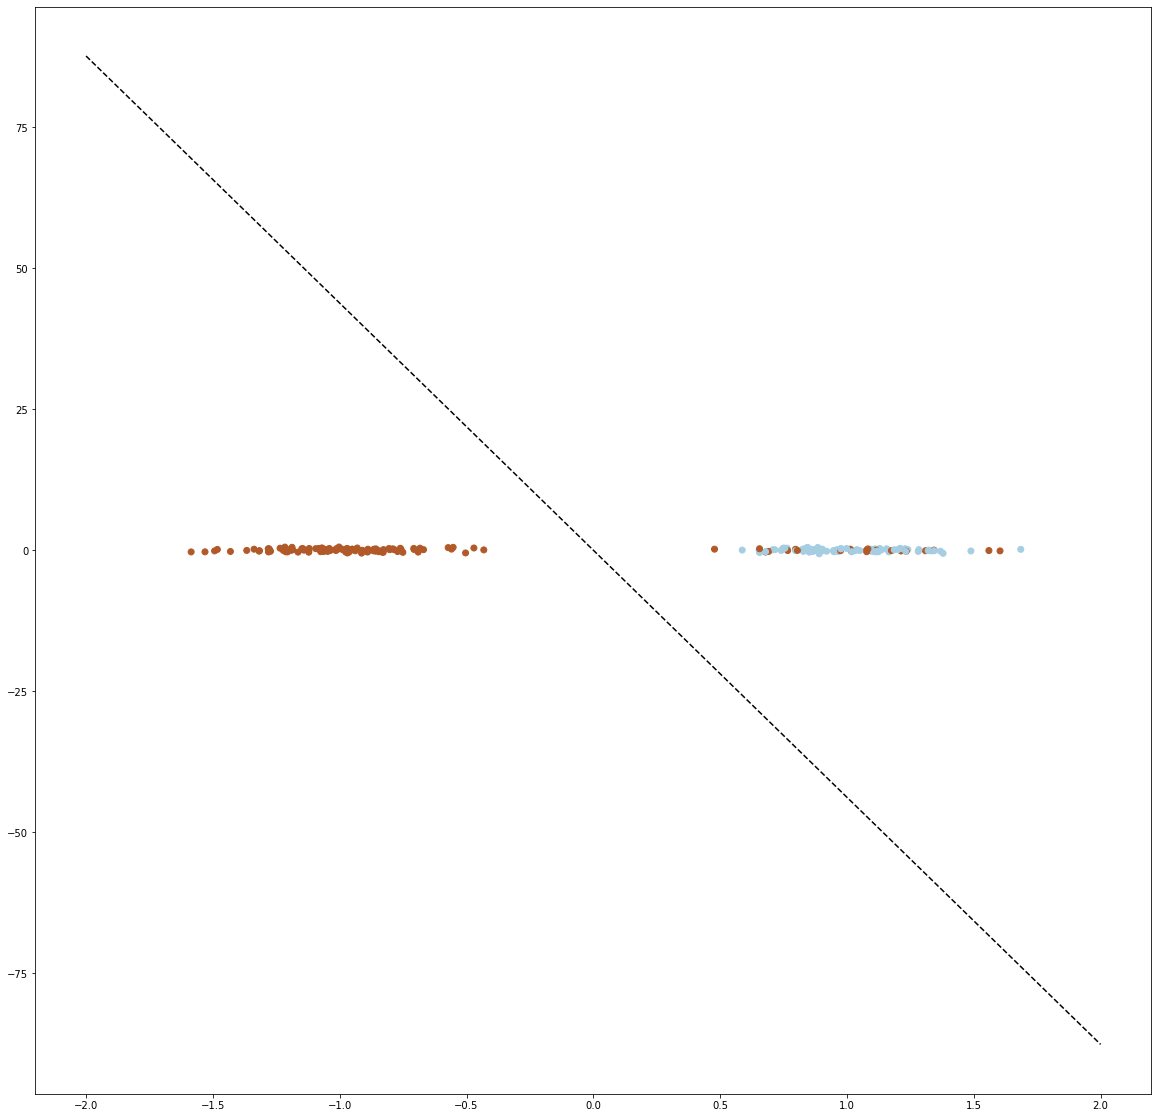

In [10]:
X_train, X_test, y_train, y_test=gen_data(0.25,0.25)
w0=perceptron(X_train.to_numpy(),y_train.to_numpy())
func_plot(X_train.to_numpy(),y_train,w0)


<p><b>Question1:</b> no, the algorithm does not converge because the dataset values are not separable</p>
<p><b>Question2:</b> no, the decision boudary isn't unique and changing the initialisation will lightly modify the result</p>
<p><b>Question3:</b> </p>

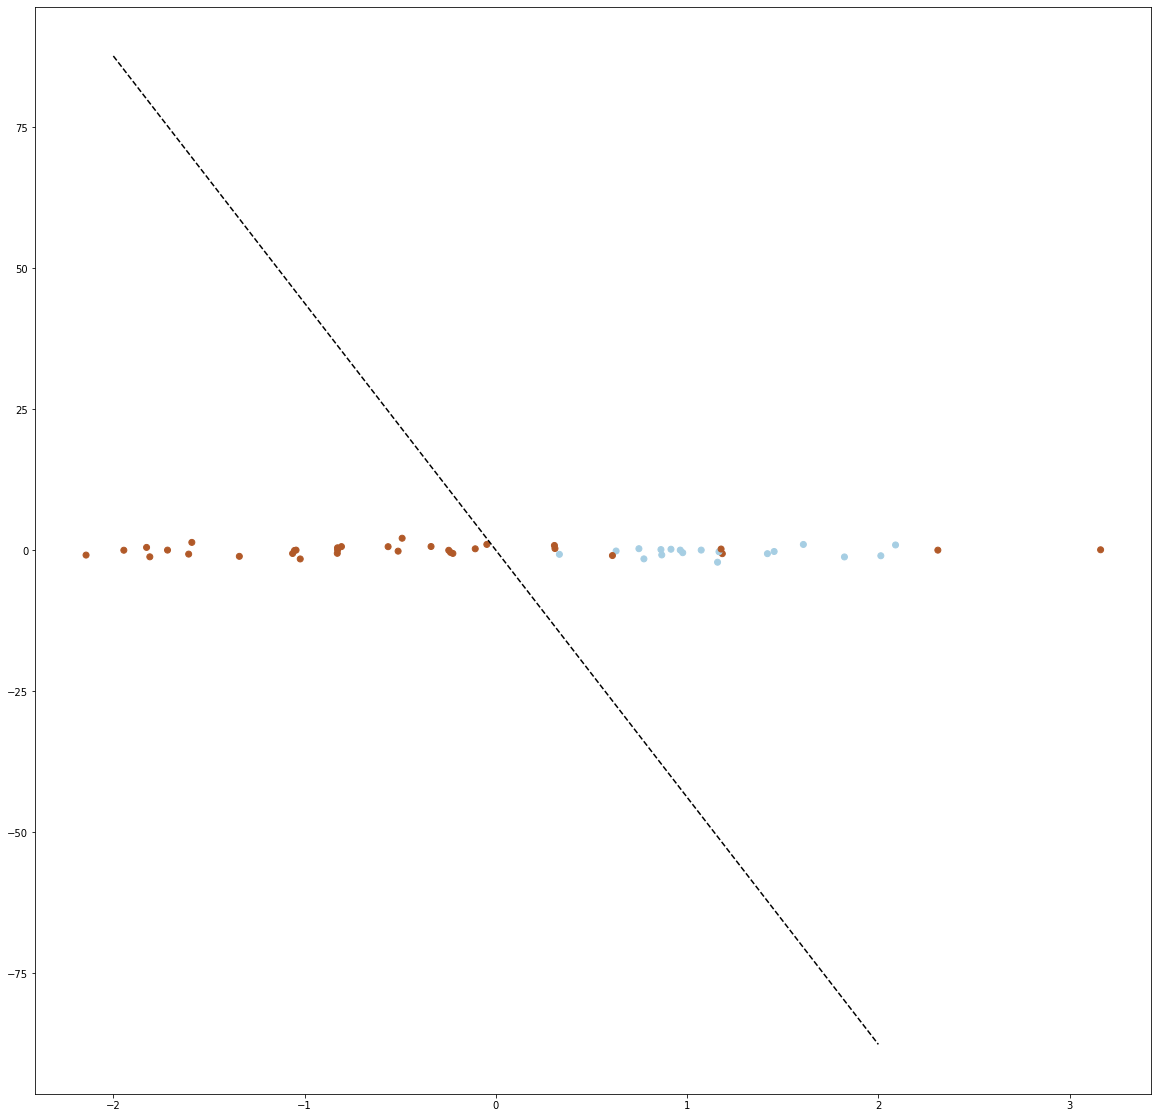

In [16]:
func_plot(X_test.to_numpy(),y_test,w0)

<p>this is the error value for the first experiment with sigma=0.25</p>

In [17]:
err(X_test.to_numpy(),y_test,w0)
 

0.14

<h2>Experiment #2</h2>

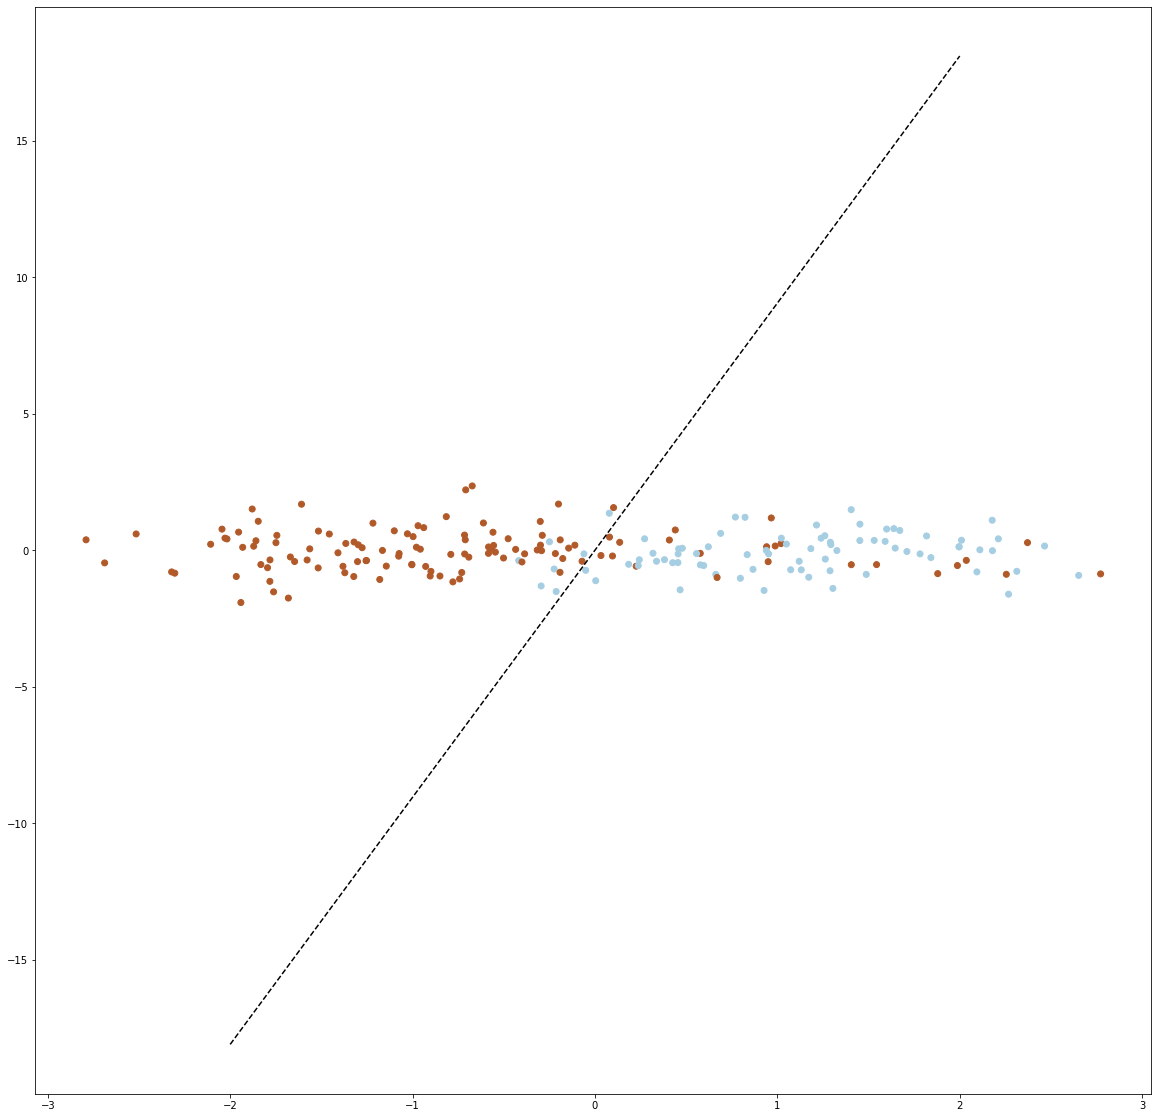

In [18]:
X_train1, X_test1, y_train1, y_test1=gen_data(0.75,0.75)
w1=perceptron(X_train1.to_numpy(),y_train1.to_numpy())
func_plot(X_train1.to_numpy(),y_train1,w1)

<p><b>Question1:</b> Also no, the algorithm does not converge because the dataset values are not separable</p>
<p><b>Question2:</b> And also no, the decision boudary isn't unique and changing the initialisation will lightly modify the result</p>
<p><b>Question3:</b> </p>

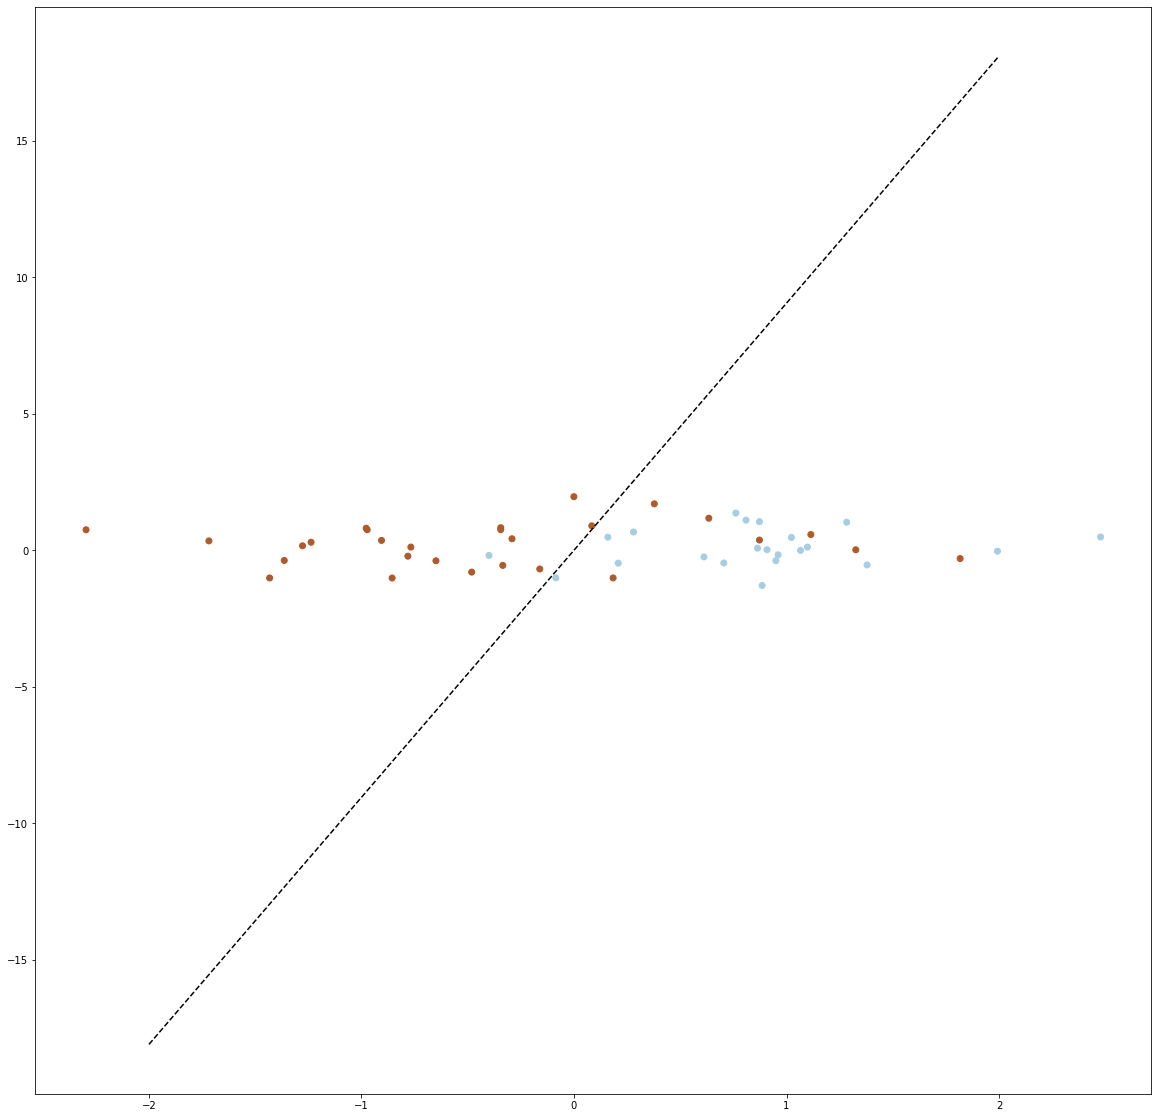

In [19]:
func_plot(X_test1.to_numpy(),y_test1,w1)

<p>this is the error value for the second experiment with sigma=0.75</p>

In [20]:
err(X_test1.to_numpy(),y_test1,w1)


0.16

<h2>Experiment #3</h2>
<p> we will experiment with varying the variance value to see the effect on the error</p>


In [13]:
sigmas=[0.01, 0.1,0.25,0.5,0.7]

means=[]
varr=[]
for sigma in sigmas:

    k=[]

    for element in range(0,30):

        X_train, X_test, y_train, y_test=gen_data(sigma,sigma)
        www=perceptron(X_train.to_numpy(),y_train.to_numpy())
        k.append(err(X_test.to_numpy(),y_test,www))

    means.append(np.mean(k))
    varr.append(np.var(k))

Text(0.5, 1.0, 'The bar error graph')

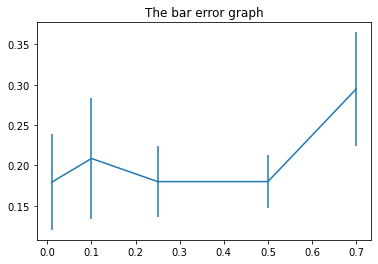

In [15]:
plt.errorbar(x=sigmas,y=means, yerr=varr)
plt.title("The bar error graph")

<b>the variance of the data and the error are directly proportional</b>